In [1]:
#设置中文字体绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 生成数据

In [2]:
#导入numpy包
import numpy as np
#设置numpy的输出格式
np.set_printoptions(threshold=100,precision= 2,suppress=True)
#给定随机种子，在同一随机条件下，每次随机的结果相同
np.random.seed(0)

In [3]:
#生成测试用数据
data = np.random.uniform(1,10,(10,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(10,1))
#转置数据，行代表数据维度，列代表数据样本
dataT = data.T
dataT

array([[5.94, 6.42, 4.81, 4.94, 9.67, 8.13, 6.11, 1.64, 1.18, 8.  ],
       [4.88, 4.41, 2.25, 3.59, 3.31, 4.62, 1.63, 2.6 , 0.68, 3.66]])

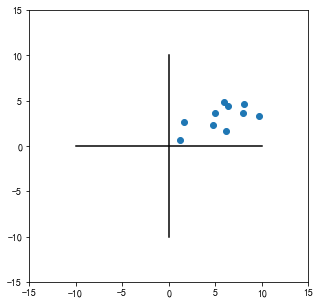

In [4]:
#绘制数据分布
import matplotlib.pyplot as plt
plt.figure(1,(5,5))
#绘制数据点
plt.scatter(data[:,0],data[:,1])
#绘制坐标轴
plt.plot([-10,10],[0,0],c = 'k')
plt.plot([0,0],[-10,10],c = 'k')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

# 求解PCA

In [5]:
#数据标准化
data_norm = data-data.mean(axis = 0)
data_normT = data_norm.T
data_normT

array([[ 0.25,  0.74, -0.87, -0.75,  3.99,  2.44,  0.43, -4.05, -4.5 ,
         2.32],
       [ 1.72,  1.25, -0.91,  0.43,  0.15,  1.46, -1.53, -0.57, -2.49,
         0.5 ]])

In [6]:
#数据的中心点位置
x_,y_ = data.mean(axis = 0)
x_,y_

(5.685096211179629, 3.163553448943638)

In [7]:
#求协方差矩阵
n = len(data_norm)
C = 1/(n-1)*np.dot(data_normT,data_norm)
C

array([[7.33, 2.22],
       [2.22, 1.86]])

In [8]:
#np.cov求解协方差矩阵
np.cov(data_normT)

array([[7.33, 2.22],
       [2.22, 1.86]])

In [9]:
#协方差矩阵的特征值和特征向量
vals,vecs = np.linalg.eig(C)
#根据特征值从大到小排序
vals = vals[np.argsort(-vals)]
vecs = vecs[:,np.argsort(-vals)]

In [10]:
#特征值
vals

array([8.12, 1.08])

In [11]:
#特征向量
R=vecs
R

array([[ 0.94, -0.33],
       [ 0.33,  0.94]])

(-15.0, 15.0)

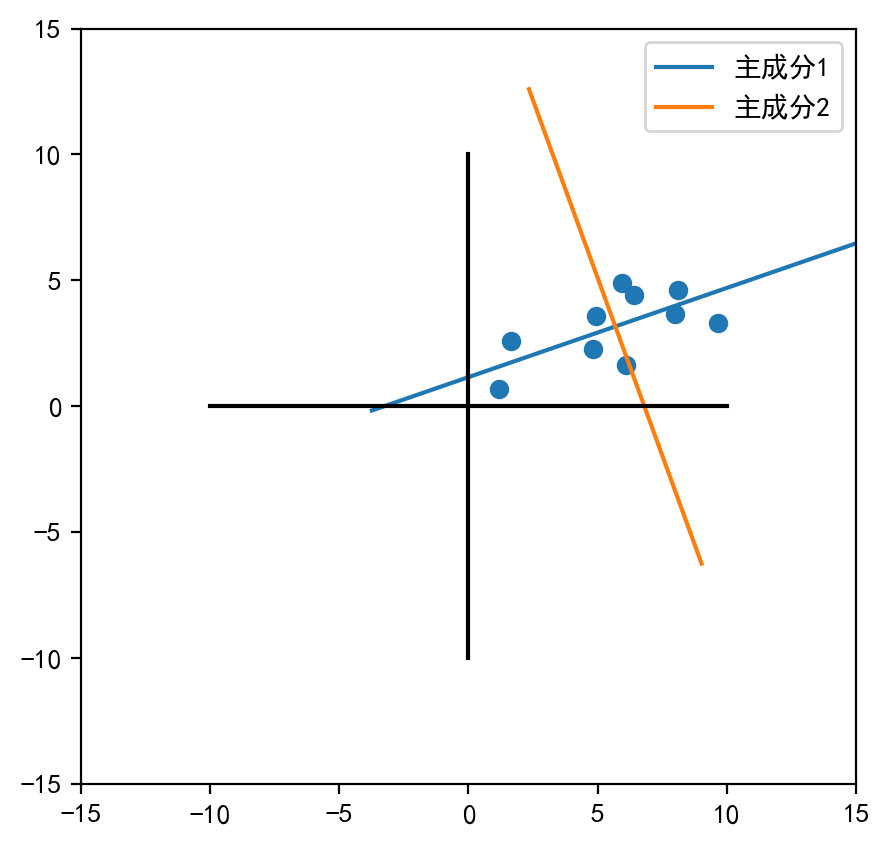

In [12]:
import matplotlib.pyplot as plt

plt.figure(1,(5,5),dpi = 200)
#绘制原始数据
plt.scatter(data[:,0],data[:,1])

size = 10
#绘制新的坐标轴，坐标轴方向是是vecs[:,0][0]和vecs[:,0][1]，坐标轴平移到数据的中心点位置
plt.plot([-size*vecs[:,0][0]+x_,size*vecs[:,0][0]+x_],
         [-size*vecs[:,0][1]+y_,size*vecs[:,0][1]+y_],label = '主成分1')
plt.plot([-size*vecs[:,1][0]+x_,size*vecs[:,1][0]+x_],
         [-size*vecs[:,1][1]+y_,size*vecs[:,1][1]+y_],label = '主成分2')

#绘制原始坐标轴
plt.plot([-10,10],[0,0],c = 'k')
plt.plot([0,0],[-10,10],c = 'k')

plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)

# 重构数据

In [13]:
#计算数据在新坐标系下的坐标
DnewT = np.dot(R.T,data_normT)
#只保留主成分1上的信息，主成分2的坐标设置为0
DnewT[1:,:] = 0
Dnew = DnewT.T
DnewT

array([[ 0.81,  1.11, -1.13, -0.56,  3.81,  2.79, -0.11, -4.  , -5.07,
         2.35],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ]])

In [14]:
#重构数据
D_T = np.dot(R,DnewT)
D_T = (D_T.T + data.mean(axis = 0)).T
D_ = D_T.T
D_T

array([[6.45, 6.73, 4.62, 5.16, 9.27, 8.31, 5.58, 1.91, 0.9 , 7.9 ],
       [3.44, 3.54, 2.79, 2.98, 4.44, 4.09, 3.13, 1.83, 1.47, 3.95]])

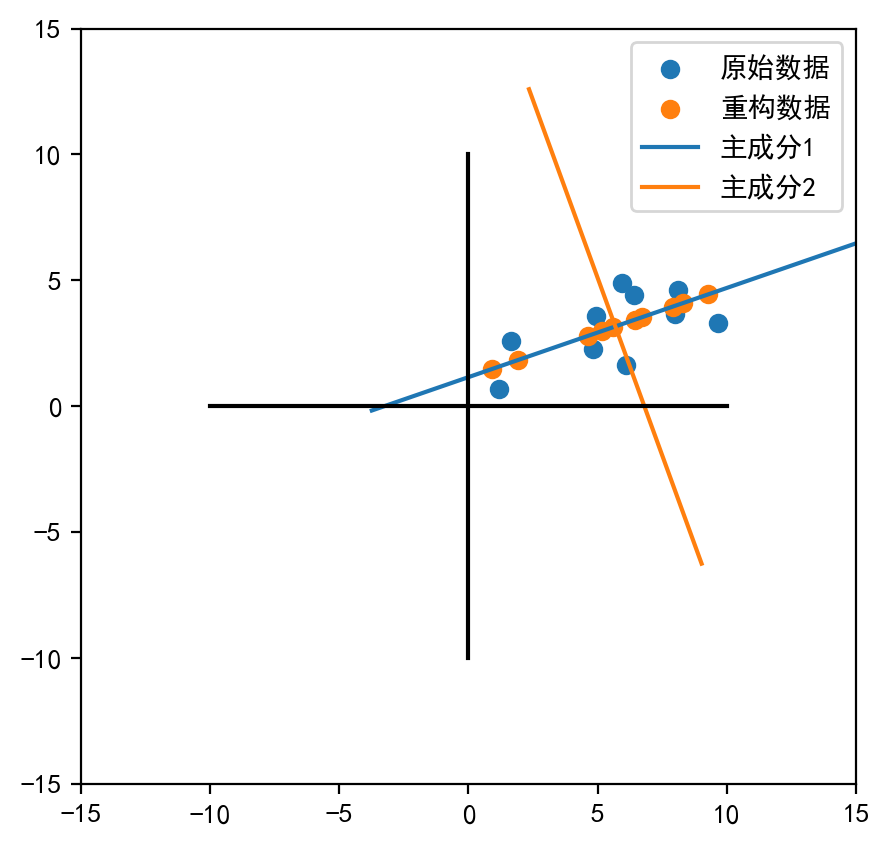

In [15]:
import matplotlib.pyplot as plt
plt.figure(1,(5,5),dpi = 200)

#绘制原始的数据
plt.scatter(data[:,0],data[:,1],label = '原始数据')
#绘制重构的数据
plt.scatter(D_[:,0],D_[:,1],label = '重构数据')

#绘制新的坐标轴，坐标轴方向是是vecs[:,0][0]和vecs[:,0][1]，坐标轴平移到数据的中心点位置
size = 10
plt.plot([-size*vecs[:,0][0]+x_,size*vecs[:,0][0]+x_],
         [-size*vecs[:,0][1]+y_,size*vecs[:,0][1]+y_],label = '主成分1')
plt.plot([-size*vecs[:,1][0]+x_,size*vecs[:,1][0]+x_],
         [-size*vecs[:,1][1]+y_,size*vecs[:,1][1]+y_],label = '主成分2')

#绘制原始坐标轴
plt.plot([-10,10],[0,0],c = 'k')
plt.plot([0,0],[-10,10],c = 'k')
plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)

plt.show()

# 另外两种方法求得PCA主成分

## SVD的V向量

In [16]:
#采用奇异值分解工具np.linalg.svd对数据进行分解
U,vals,VT = np.linalg.svd(data_norm)
#V矩阵
V = VT.T
V

array([[-0.94,  0.33],
       [-0.33, -0.94]])

In [17]:
#我们前面算的主成分
R

array([[ 0.94, -0.33],
       [ 0.33,  0.94]])

## 用sklearn里面的PCA包

In [18]:
from sklearn.decomposition import PCA
#创建一个PCA模型，指定主成分为2个
pca = PCA(n_components=2)
#用数据训练这个PCA模型
pca.fit(data)
#把训练好的PCA模型应用在数据上，求得数据在各主成分上的投影距离
Y = pca.fit_transform(data)
#在模型参数中提取出主成分
vecs = pca.components_.T
vecs

array([[-0.94,  0.33],
       [-0.33, -0.94]])

# 测试噪声对PCA的影响

In [19]:
#如果我们在数据中加入异常值,定义一个角度放入异常值
i = 720
i = 2*i/360*np.pi
data_outsider=np.array([np.sin(i)*5*i/(2*np.pi),np.cos(i)*5*i/(2*np.pi)])
data = np.vstack((data,data_outsider))

In [20]:
data_outsider

array([-0., 10.])

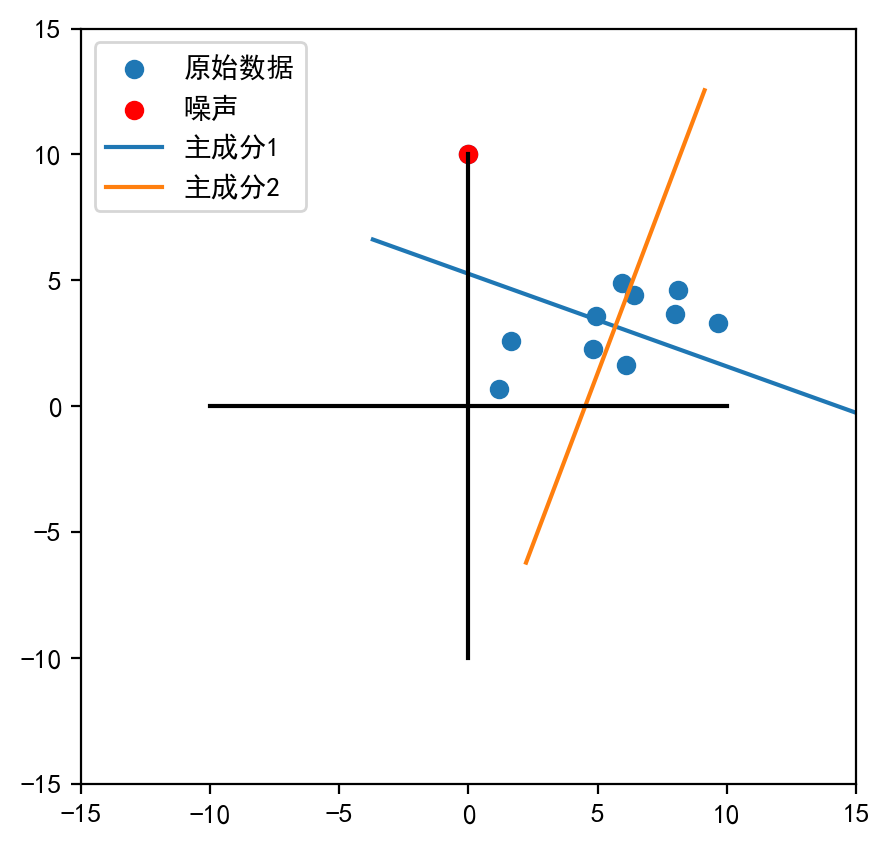

In [21]:
#计算主成分
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
Y = pca.fit_transform(data)
vecs = pca.components_.T
#可视化
import matplotlib.pyplot as plt
plt.figure(1,(5,5),dpi = 200)
#绘制原始数据
plt.scatter(data[:,0],data[:,1],label = '原始数据')
#标记噪声
plt.scatter([data_outsider[0]],[data_outsider[1]],c = 'r',label = '噪声')
size = 10
#绘制PCA的坐标轴
plt.plot([-size*vecs[:,0][0]+x_,size*vecs[:,0][0]+x_],
         [-size*vecs[:,0][1]+y_,size*vecs[:,0][1]+y_],label = '主成分1')
plt.plot([-size*vecs[:,1][0]+x_,size*vecs[:,1][0]+x_],
         [-size*vecs[:,1][1]+y_,size*vecs[:,1][1]+y_],label = '主成分2')
#绘制原始坐标轴
plt.plot([-10,10],[0,0],c = 'k')
plt.plot([0,0],[-10,10],c = 'k')
plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()